# Hypothesis testing

In [115]:
import sys
sys.path.append('/vagrant/data-science-from-scratch/code/')   # code from DSFS book's git repo cloned here
import working_with_data as wwd   # module from data science from scratch

In [116]:
import random

def flip_coin(theta):
    return 1.0 if random.random() <= theta else 0.0

def sample_coins(theta=0.5, n=100):
    return [flip_coin(theta) for _ in range(n)]

In [118]:
theta = 0.5
n = 100
simulations = 10000
samples = [sum(sample_coins(theta, n)) for _ in range(simulations)]

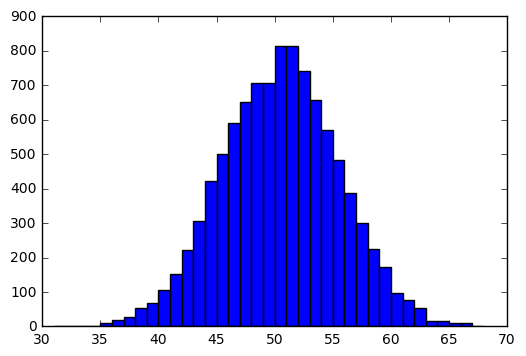

In [119]:
wwd.plot_histogram(samples, 1)

## Hypothesis test for fair coin

In [120]:
def coin_test_statistic(xs):
    prop_ones = float(sum(xs)) / len(xs)
    return abs(prop_ones - 1./2)

def threshold_test(xs, test_statistic, c):
    """Returns True if test rejects the null hypothesis, i.e., test_statistic > c"""
    return test_statistic(xs) > c

def coin_test(xs, c=0.10):
    """Returns True if null hypothesis is rejected"""
    return threshold_test(xs, coin_test_statistic, c)

In [122]:
xs = sample_coins(theta=0.5, n=100)
print "Test statistic", coin_test_statistic(xs)
print "Is null rejected?", coin_test(xs, c=0.05)

Test statistic 0.07
Is null rejected? True


## Power of test

In [ ]:
def power_coin_test(theta, c=0.10):
    """Probability that the test will reject the null hypothesis when the true probability 
    of heads is theta."""
    n = 100
    simulations = 10000
    rejections = sum(coin_test(xs=sample_coins(theta, n), c=c) 
                     for _ in range(simulations))
    return float(rejections) / simulations

What is probability we reject null when the coin actually has $\theta = 0.7$?

In [124]:
print power_coin_test(theta=0.5, c=0.05)

0.3191


## Figuring out $\alpha$

The worst-case $\theta \in \Theta_0$ is either $\theta = 0.45$ or $\theta = 0.55$.  So what is $\alpha$?

In [131]:
print "Alpha is", power_coin_test(theta=0.55, c=0.13)

Alpha is 0.0391


## P-Values

In [132]:
def p_value_coin(xs):
    tx = coin_test_statistic(xs)
    return power_coin_test(theta=0.55, c=tx)

In [133]:
theta = 0.65
n = 100
xs = sample_coins(theta, n=100)
print "I flipped coin", n, "times and observed", sum(xs), "heads."
print "At what p-value can I reject the null?", p_value_coin(xs)

I flipped coin 100 times and observed 69.0 heads.
At what p-value can I reject the null? 0.0017
